In [9]:
import pyclesperanto_prototype as cle

cle.select_device('Intel')

cle.get_device()

<Intel(R) UHD Graphics on Platform: Intel(R) OpenCL HD Graphics (1 refs)>

In [10]:
cle.set_wait_for_kernel_finish(True)

# Centroids of 2D labels

In [11]:
labels = cle.artificial_tissue_2d(width=2048, height=1024, delta_x=128, delta_y=96)
cle.imshow(labels, labels=True)

LogicError: when processing argument #4 (1-based): clSetKernelArg failed: INVALID_MEM_OBJECT

In [ ]:
import time

pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(labels, pointlist)
    print("CPU centroid took " + str(time.time() - start_time) + " s")

In [12]:
pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(labels, pointlist, use_gpu=True)
    print("GPU centroid took " + str(time.time() - start_time) + " s")

LogicError: when processing argument #4 (1-based): clSetKernelArg failed: INVALID_MEM_OBJECT

# Centroids of 3D labels

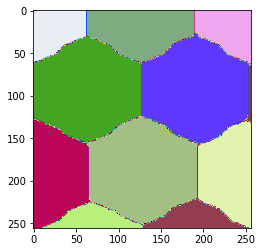

In [6]:
stack = cle.create([128, 256, 256])

for z in range(0, 128):
    cle.copy_slice(labels, stack, z)

cle.imshow(stack, labels=True)

In [7]:
import time

pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(stack, pointlist)
    print("CPU centroid took " + str(time.time() - start_time) + " s")

CPU centroid took 2.553879499435425 s
CPU centroid took 2.472822666168213 s
CPU centroid took 2.5568020343780518 s
CPU centroid took 2.4760313034057617 s
CPU centroid took 2.509720802307129 s
CPU centroid took 2.4645307064056396 s
CPU centroid took 2.486889600753784 s
CPU centroid took 2.467751979827881 s
CPU centroid took 2.506230354309082 s
CPU centroid took 2.564911127090454 s


In [8]:
pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(stack, pointlist, use_gpu=True)
    print("GPU centroid took " + str(time.time() - start_time) + " s")

GPU centroid took 0.5886585712432861 s
GPU centroid took 0.05682063102722168 s
GPU centroid took 0.057845354080200195 s
GPU centroid took 0.05884265899658203 s
GPU centroid took 0.06582427024841309 s
GPU centroid took 0.060837507247924805 s
GPU centroid took 0.059839725494384766 s
GPU centroid took 0.06083941459655762 s
GPU centroid took 0.06582212448120117 s
GPU centroid took 0.0608372688293457 s
